# Concrete Compressive Strength Predictive Analysis

In [1]:
#Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Importing the Dataset 

In [2]:
#Importing "Concrete_Data" dataset 

df = pd.read_csv("C:\\Users\\91988\\Downloads\\Concrete_Data.csv")
df

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


<span style="color:red">Understanding the raw Dataset</span>

<span style="color:blue">From the above, We can see that the given dataset has 1030 rows and 9 columns.</span>

<span style="color:blue">CMS (Concrete compressive strength) is the dependent variable or the target value which means CMS is the value that we want to predict from the given dataset.</span>

<span style="color:blue">Also, there are 8 other variables other than CMS which are known as the predictors' variables.</span>

### Checking data type of all columns in the given dataset 

In [3]:
#Using pandas "dtypes" function to get data type of all columns

df.dtypes

Cement              float64
Blast               float64
Fly Ash             float64
Water               float64
Superplasticizer    float64
CA                  float64
FA                  float64
Age                   int64
CMS                 float64
dtype: object

<span style="color:blue"> From the above result, it is evident that there are just numerical (quantitative) variables in the given dataset, that is, variables like Cement, Blast, Fly Ash, Water, Superplasticizer, CA, FA, and CMS are in float64 format which means their data is in decimal form, whereas Age is in int64 format indicating it is in 64-bit integer format.</span>

### Missing Values 

__It is important to check the missing values in the dataframe because if the dataframe has missing values, the data can lose expressiveness, which can lead to weak and biased analyses__

In [4]:
df.isnull().sum()

Cement              0
Blast               0
Fly Ash             0
Water               0
Superplasticizer    0
CA                  0
FA                  0
Age                 0
CMS                 0
dtype: int64

<span style="color:blue">From the above results, it can be said that there are no missing values in the dataframe</span>

### Key Statistics using Describe Function  

In [5]:
#Using pandas "describe" attribute to get overall statistical summary of the given dataframe

df.describe()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


<span style="color:red"> **KEY INSIGHTS** </span>


<span style="color:blue">From the above result, We can infer that the average of dependent variable, that is Concrete Compressive strength is 35.8. While the minimum cms is 2.3 and maximum is 82.6. Moreover the 25% of cms data is having 23.7 megapascal and 75% is having 46.1 megapascal which shows that CMS values lies within the 23.7 to 46.1 range.</span>
    

<span style="color:blue"> The Standard Deviation of Superplasticizer is 5.9 which is relatively small indicating that superplasticizer tend be close to mean. </span>

<span style="color:blue"> However, in the case of Cement the standard deviation is 104 which is comparatively high which means there is high divergence from the mean.

<span style="color:blue"> Also, the data for Cement, Blast, Fly Ash, CA (Coarse Aggregate), and Age is skewed to the right as their mean is more than their median (50%) value. </span>

In [6]:
#Using pandas "corr" function to check the correlation among variables

dfcorr = df.corr()
dfcorr

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
CA,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
FA,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
CMS,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


<span style="color:blue">From the above, we can infer that there is high positive correation between Concrete compressive strength(CMS) and cement, i.e., 0.5. After that Age and Superplasticizer also have a postive correlation with CMS. Therefore, we can say that as the cement and superplasticizer increases, CMS goes high. Whereas, there is negative correlation between CMS and water. </span>

### Correlation Visualization

<AxesSubplot:>

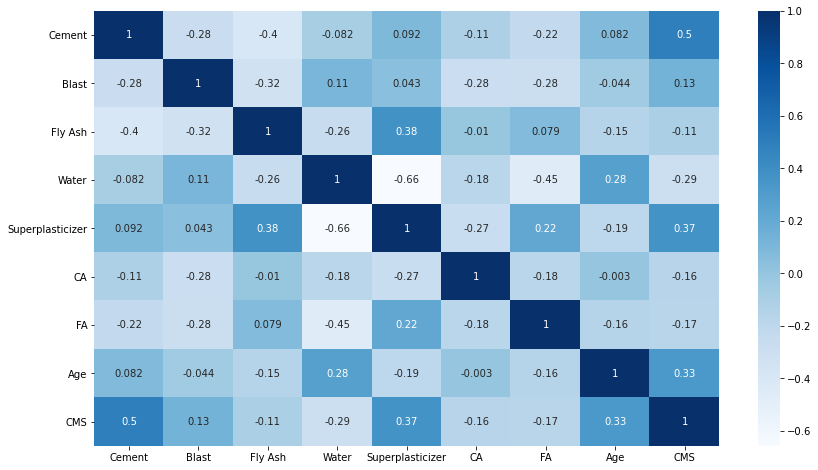

In [7]:
#Using seaborn's "heatmap" to visualize the correlation among variables 

plt.figure(figsize=(14,8))
sns.heatmap(dfcorr, annot = True, cmap = "Blues")

### Data Preprocessing 

<span style = "color:  green"> It is important to prepare data before model building. In this stage, data will be divided in train and test split and standardscaler will be so that distribution can have 0 mean and 1 standard deviation </span>

In [8]:
#Defining the variables

#defining "x" or independent variables

x = df.drop("CMS", axis = 1).to_numpy()  #using pandas "drop" attribute to drop CMS column as it is a target variable from x

#placing target variable "CMS" in y variable

y = df["CMS"].to_numpy()

<span style="color: blue">In the above case, CMS (Concrete compressive strength) is dropped from the dataset as it is the dependent variable that we want to predict, therefore variable "x" have all other 8 variables as independent variables. and CMS is placed in the target variable "y".</span>

In [9]:
#Randomly splitting data into training and testing data using function train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)  

#the test_size parameter sets the proportion of data that is split into the testing set. 
#Thus, here 20% of data samples will be utilized for testing

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 206
number of training samples: 824


<span style="color:blue">After splitting the data into training and testing sets, we can see that 206 samples will be used for testing and 824 will be used for training</span>

In [10]:
#Using "StandardScaler" to standardize the data

sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

<span style="color: blue;"> We standardized the above data using StandardScaler function of preprocessing module of sklearn library so that it can organise the mentioned data in standard normal distribution.</span>

### Model Building 

In [11]:
#Multiple Regression script to predict CMS(Concrete compressive strength)

for name,method in [('Linear Regression', LinearRegression(n_jobs=-1))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)

print('Method: {}'.format(name))   

#Coefficents
print('\nIntercept: {:0.2f}'.format(float(method.intercept_)))
coeff_table=pd.DataFrame(np.transpose(method.coef_),df.drop('CMS',axis=1).columns,columns=['Coefficients'])
print('\n')
print(coeff_table)
    
#Getting R^2, mean absolute error, Mean squared error and root mean squared error

print('\nR2: {:0.2f}'.format(metrics.r2_score(y_test, predict)))
print('Mean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_test, predict)))  
print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_test, predict)))  
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict))))

Method: Linear Regression

Intercept: 35.95


                  Coefficients
Cement               13.027382
Blast                 8.952089
Fly Ash               5.955866
Water                -2.849777
Superplasticizer      1.737942
CA                    1.592146
FA                    2.035610
Age                   7.219311

R2: 0.62
Mean Absolute Error: 8.26
Mean Squared Error: 113.18
Root Mean Squared Error: 10.64


### Decision Making 

<span style="color: red;">**Key Insights**</span>

__1. The final Multiple Regresssion equation is:__

__CMS = 35.95 + 13.02(Cement) + 8.9(Blast) + 5.9(Fly Ash) - 2.8(Water) + 1.7(Superplasticizer) + 1.5(CA) + 2.03(FA) + 7.2 (Age)__

__2. 0.62 R-squared value signifies that we can 62% sure that the model explained the variablity of the reponse data around its mean. Thus, evaluating it on the R-squared range scale which is 0 to 1, 0.62 value of r-squared makes the multiple regression model a good model but not great.__

__3. Comparing the the Mean Absolute Error value, which is, 8.26 with the Mean Squared Error value, which stands at 113.18 shows that there are significant outliers that are far away from the expected values. This indicates that the current model is not performing better__


### Comparing Original values with Predicted values 

In [13]:
#Creating a dataframe for predicted values and orginal values

predict2 = predict.T
diff = predict2-y_test
predicted_df = {'Original Values':y_test,'Predicted Values':predict2.round(1),'Difference':diff.round(1)}

pd.DataFrame(predicted_df).head(15)

,Original Values,Predicted Values,Difference
0,68.10,61.1,-7.0
1,71.30,53.6,-17.7
2,25.18,22.3,-2.9
3,19.52,27.9,8.3
4,38.02,51.6,13.6
5,19.69,18.4,-1.3
6,26.91,30.3,3.4
7,15.52,24.3,8.8
8,21.07,28.7,7.7
9,18.03,22.3,4.2


<span style="color: blue;">The above dataframe shows that there is a signifant difference between original values and predicted values thus, there is a need to improve the performance of the model by treating the outliers and transforming skewed variables.</span>

# Thank You